In [1]:
from sklearn.datasets import load_svmlight_file

data_dir="/workspace/chipper_data/chipper-0.3.0-data/"

train_data = load_svmlight_file(data_dir + "training_data.ll")
X_train = train_data[0].toarray()
y_train = train_data[1]

test_data = load_svmlight_file(data_dir + "testing_data.ll")
X_test = test_data[0].toarray()
y_test = test_data[1]

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, matthews_corrcoef

model = XGBClassifier(objective="binary:logistic")
# Number of boosted trees to fit.
n_estimators = [500] # range(50, 500, 50)
# Maximum tree depth for base learners.
max_depth = [10] #range(1, 11, 2)
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", 
                           n_jobs=1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

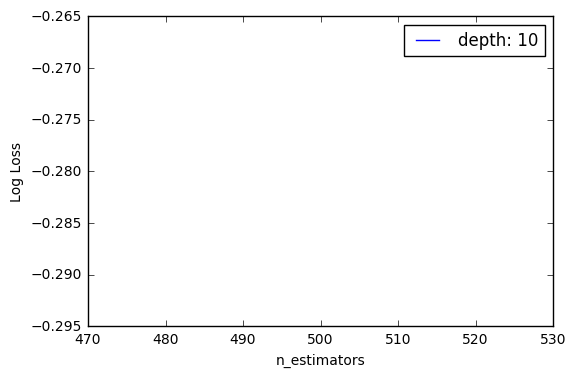

In [5]:
import numpy as np
from matplotlib import pyplot

# plot results
%matplotlib inline


scores = np.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    pyplot.plot(n_estimators, scores[i], label='depth: ' + str(value))
pyplot.legend()
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')

In [7]:
# save model to file
import pickle
pickle.dump(grid_result, open("/tmp/grid_result.txt", "wb"))


In [ ]:
# load model from file
#loaded_model = pickle.load(open("pima.pickle.dat", "rb"))

In [ ]:
#xgboost.plot_importance(grid_result.best_estimator_.booster)

In [8]:
# make predictions
predicted = grid_result.predict(X_test)

print "Accuracy was %.2f%%\n" % (100 * accuracy_score(y_test, predicted))
print classification_report(y_test, predicted)
((tn, fp), (fn, tp)) = confusion_matrix(y_test, predicted)
sensitivity = 100.0 * tp / (tp + fn)
specificity = 100.0 * tn / (tn + fp)
precision = 100.0 * tp / (tp + fp)
print "sensitivity(recall)=%.1f, specificity=%.1f, precision=%.1f" % (sensitivity, specificity, precision)

Accuracy was 80.29%

             precision    recall  f1-score   support

        0.0       0.79      0.82      0.81       208
        1.0       0.81      0.79      0.80       208

avg / total       0.80      0.80      0.80       416

sensitivity(recall)=78.8, specificity=81.7, precision=81.2
